In [1]:
import os
import cv2
import random
import numpy as np
import tensorflow as tf
from pathlib import Path
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

2025-06-28 12:40:28.949741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751114429.125795      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751114429.172678      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
female_actresses = [
    "Alia Bhatt",
    "Charlize Theron",
    "Billie Eilish",
    "Jessica Alba",
    "Priyanka Chopra",
    "Natalie Portman",
    "Elizabeth Olsen",
    "Camila Cabello",
    "Courtney Cox",
    "Ellen Degeneres",
    "Margot Robbie",
    "Anushka Sharma",
    "Lisa Kudrow",
    "Claire Holt",
    "Alexandra Daddario"
]


In [3]:
folders = []
img_data =[]
labels =[]
persons=[]
label=0
count=0
i = 0
for root, dirs, files in os.walk('/kaggle/input/face-recognition-dataset/Original Images/Original Images'):
    i += 1
    if( i== 1):
        folders = dirs
        print('i : ', i)
        print("Root:", root)
    elif  i>0 and folders[i-2] not in female_actresses and count < 4:
        j = 0
        print("-----------------------------------------------------------")
        for file_name in files:
            j +=1
            img_path = os.path.join(Path(root), file_name)
            person = folders[i-2]
            img_data.append(img_path)
            persons.append(person)
            labels.append(label)
            
            ''' 
            if( j <= 2):
                print('i : ', i)
                print("Image Path:", img_path)
                print("Person : ", person)
                print("Label:", label)
            '''
        label+=1
        count+=1
        print(f'Loop number is : {i}')
        print(f'{person} have {j} images')

i :  1
Root: /kaggle/input/face-recognition-dataset/Original Images/Original Images
-----------------------------------------------------------
Loop number is : 4
Zac Efron have 91 images
-----------------------------------------------------------
Loop number is : 9
Hrithik Roshan have 101 images
-----------------------------------------------------------
Loop number is : 10
Tom Cruise have 58 images
-----------------------------------------------------------
Loop number is : 11
Roger Federer have 77 images


In [4]:
full_dataset = list(zip(img_data, labels, persons))
random.shuffle(full_dataset)

In [5]:
img_oath, label, _ = full_dataset[0]
print("First Image Path:", img_oath)
print("First Label:", label)

First Image Path: /kaggle/input/face-recognition-dataset/Original Images/Original Images/Hrithik Roshan/Hrithik Roshan_99.jpg
First Label: 1


In [6]:
img_size = (227, 227)
output_unit= 4
#output_unit = len(folders)- len(female_actresses)
print('Image shape: ', img_size)
print('output shape: ', output_unit)

Image shape:  (227, 227)
output shape:  4


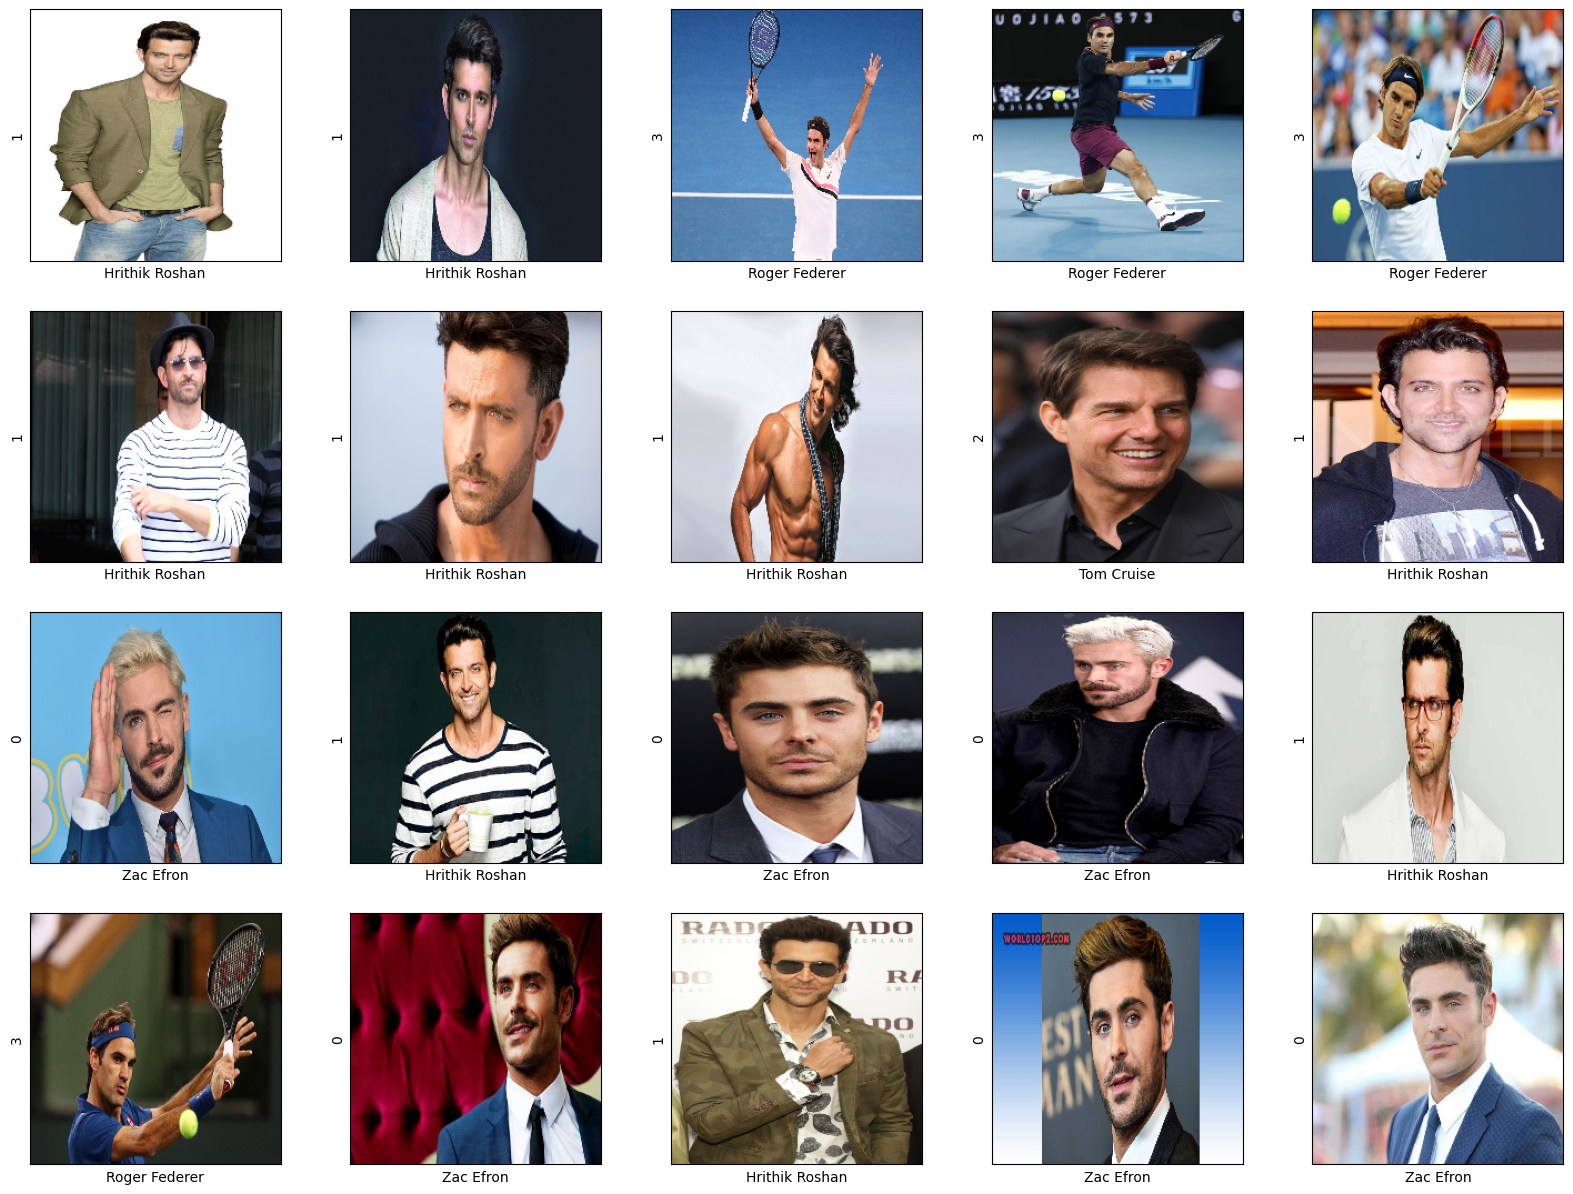

In [7]:
i = 0
plt.figure(figsize=(20,15))

for i in range(20):
    img_path, label, person = full_dataset[i]
    img_data = cv2.imread(img_path)
    img_data = cv2.resize(img_data, img_size)
    plt.subplot(4,5,i+1)
    plt.imshow(cv2.cvtColor(img_data, cv2.COLOR_BGR2RGB))
    plt.ylabel(label)
    plt.xlabel(person)
    plt.xticks([])
    plt.yticks([])
plt.show()
    


In [8]:
img, label,_ =full_dataset[0]
print(img, label)

/kaggle/input/face-recognition-dataset/Original Images/Original Images/Hrithik Roshan/Hrithik Roshan_99.jpg 1


In [9]:
X_train = []
Y_train=[]
X_test=[]
Y_test=[]
for i in range(len(full_dataset)):
    x = round(len(full_dataset)* 0.8)
    img, label, _ = full_dataset[i]
    if( i < x):
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_train.append(img_data)
        Y_train.append(label)
    
    else:
        img_data = cv2.imread(img)
        img_data = cv2.resize(img_data, img_size)
        X_test.append(img_data)
        Y_test.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train = np.reshape(Y_train, (-1,1))

X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test = np.reshape(Y_test, (-1,1))

print("Traning image shape: ", X_train.shape)
print("Traning label shape: ", Y_train.shape)
print("Test image shape: ", X_test.shape)
print("Test label shape: ", Y_test.shape)


Traning image shape:  (262, 227, 227, 3)
Traning label shape:  (262, 1)
Test image shape:  (65, 227, 227, 3)
Test label shape:  (65, 1)


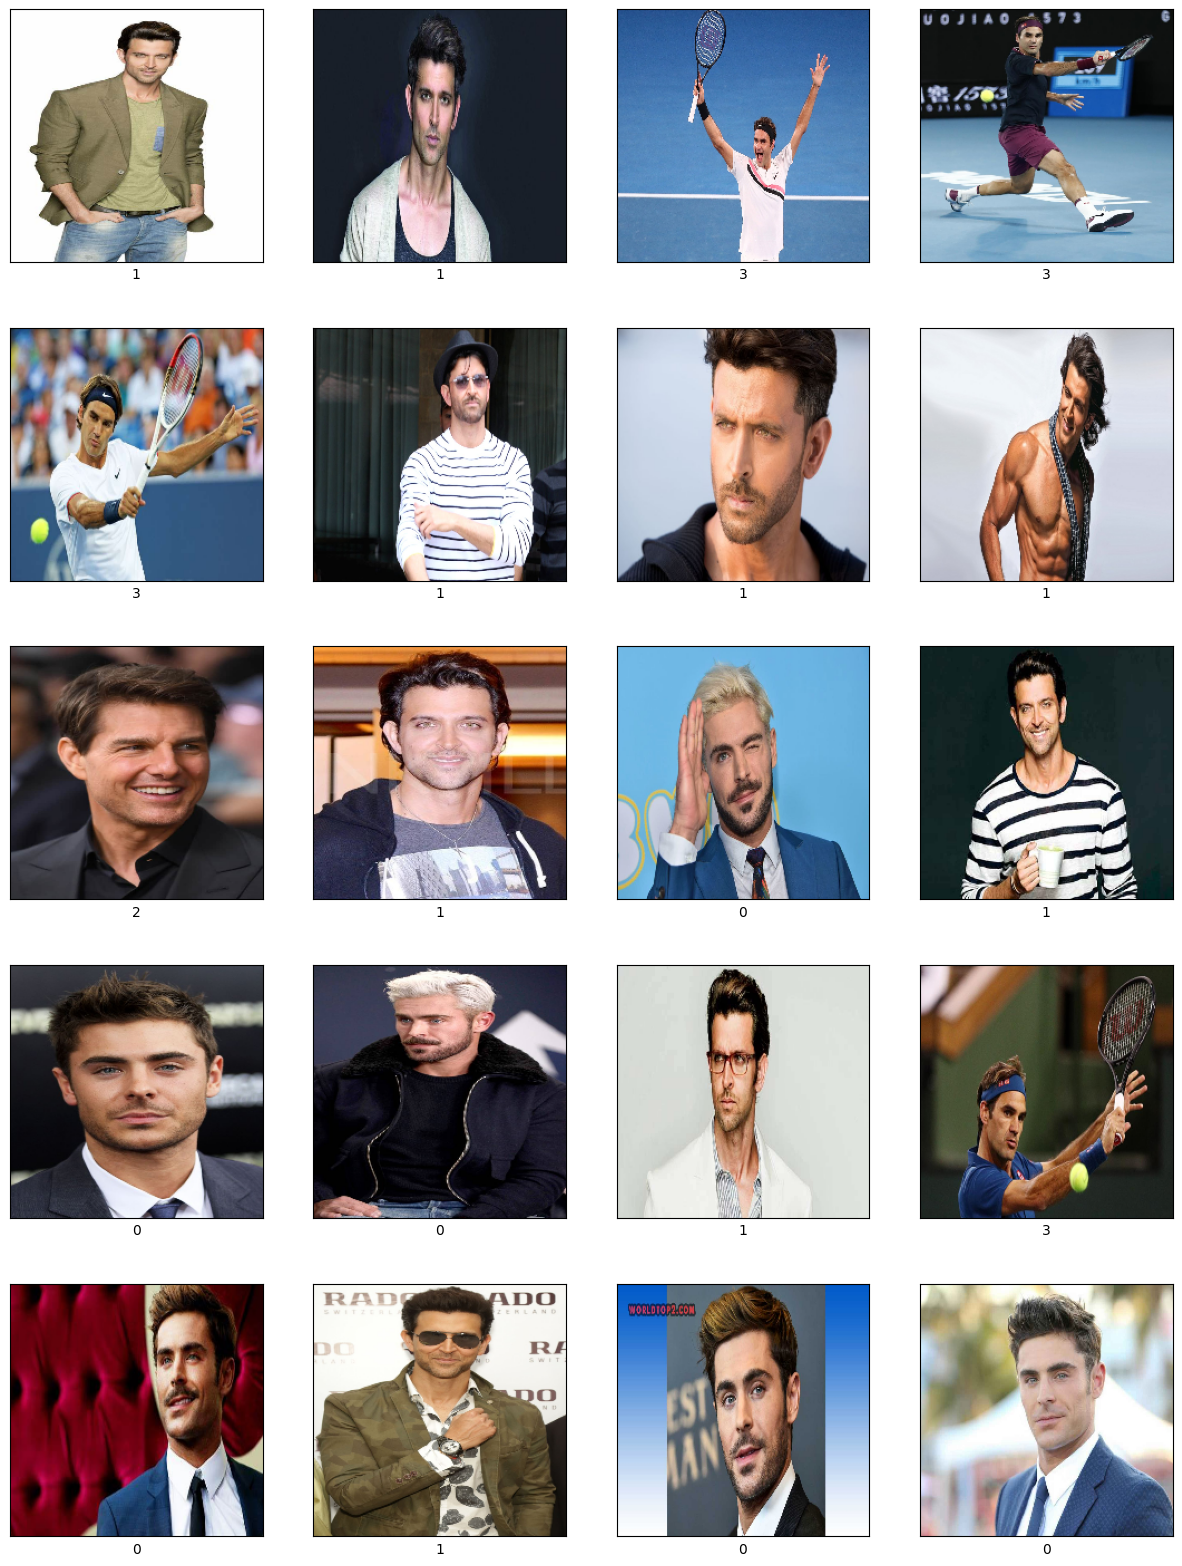

In [10]:
j= 0
plt.figure(figsize=(15,20))
for i in range(20):
    plt.subplot(5, 4,i+1)
    img = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i][0])

# Substract data by mean value

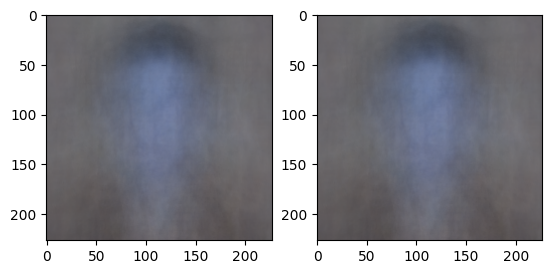

In [11]:
train_mean = X_train.mean(axis=0)
train_std = X_train.std(axis=0)
test_mean = X_train.mean(axis=0)
test_std = X_train.std(axis=0)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_mean.astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(test_mean.astype('uint8'))
plt.show()


In [12]:
X_train[0].shape

(227, 227, 3)

In [13]:
X_train = X_train - train_mean
X_test = X_test - test_mean

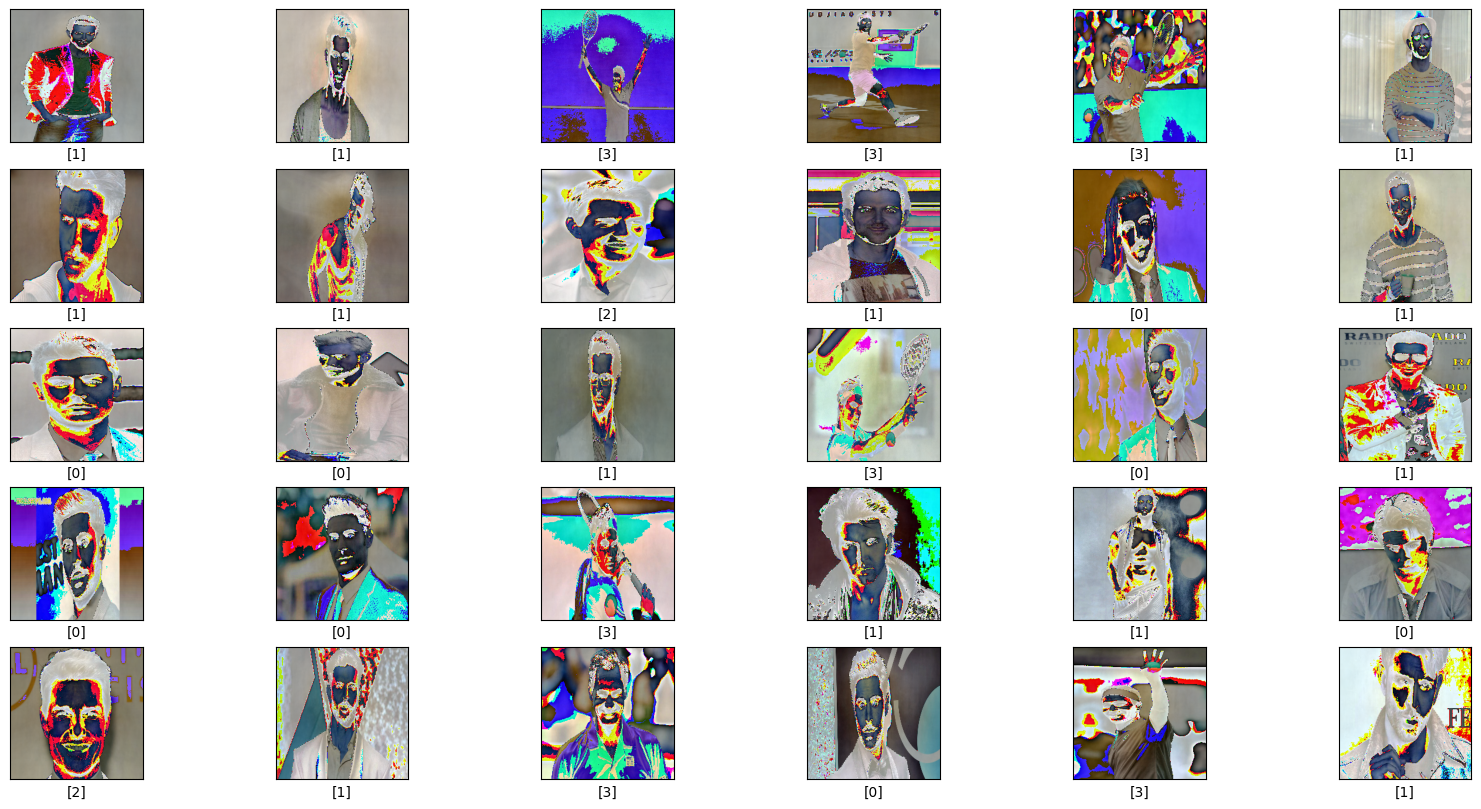

In [14]:

i = 0
plt.figure(figsize=(20,10))
for img in range(30):
    plt.subplot(5, 6, i+1)
    plt.imshow(X_train[img].astype('uint8'))
    plt.xlabel(Y_train[img])
    plt.xticks([])
    plt.yticks([])
    i +=1
plt.show()

In [15]:
model = keras.Sequential([
    
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),


    layers.Dense(output_unit),
    layers.Activation('softmax')
])

model.summary()

I0000 00:00:1751114458.031328      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1751114458.032056      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 55, 55, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 17, 256)         │       2,973,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 6, 6, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 6, 6, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4, 4, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │              

 Total params: 23,995,140 (91.53 MB)

 Trainable params: 23,976,004 (91.46 MB)

 Non-trainable params: 19,136 (74.75 KB)

In [16]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


In [17]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=10,           
    restore_best_weights=True  
)

h = model.fit(
    x=X_train,
    y=Y_train,
    epochs=200,
    validation_split=0.2,
    batch_size=16 
)


Epoch 1/200


I0000 00:00:1751114467.023688      65 service.cc:148] XLA service 0x7dbba800acb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751114467.024196      65 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751114467.024220      65 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751114467.696623      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.2153 - loss: 2.2452 

I0000 00:00:1751114474.027813      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 548ms/step - accuracy: 0.2346 - loss: 3.1334 - val_accuracy: 0.1509 - val_loss: 110.5308
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3308 - loss: 2.7908 - val_accuracy: 0.1698 - val_loss: 112.1385
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4982 - loss: 2.0671 - val_accuracy: 0.2642 - val_loss: 87.7525
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4298 - loss: 2.0179 - val_accuracy: 0.1887 - val_loss: 48.0832
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6352 - loss: 1.2239 - val_accuracy: 0.3019 - val_loss: 21.3719
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5661 - loss: 1.6004 - val_accuracy: 0.3585 - val_loss: 28.2488
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6116 - loss: 1.2045 - val_accuracy: 0.3208 - val_loss: 15.8667
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6630 - loss: 1.0054 - val_accuracy: 0.3

In [18]:
train_loss = h.history['loss']
val_loss = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']

In [19]:
epoch = range(1, len(val_acc)+1)
epoch

range(1, 201)

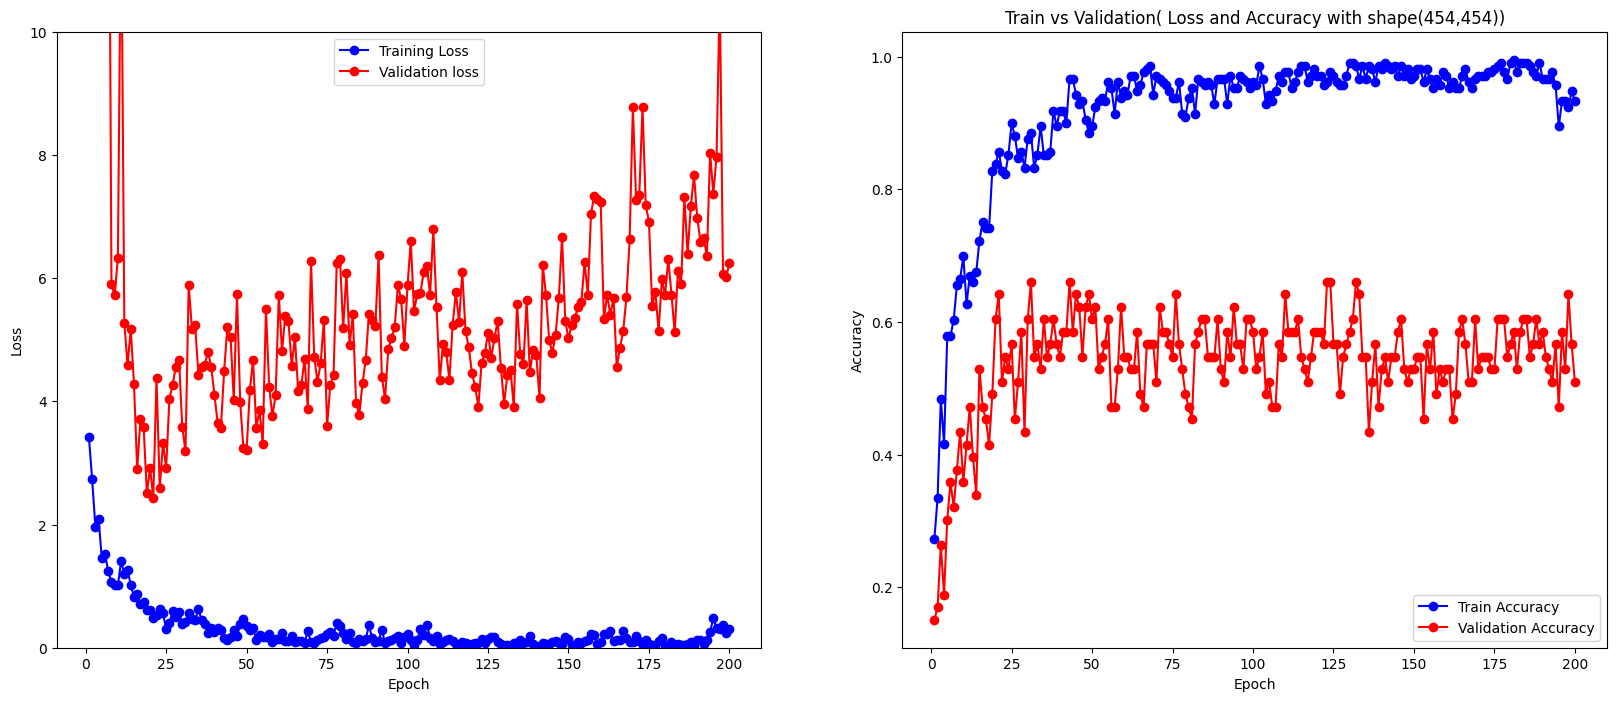

In [20]:
epoch = range(1, len(val_acc)+1)
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epoch, train_loss,'bo-', label='Training Loss')
plt.plot(epoch, val_loss,'ro-', label= 'Validation loss')
plt.ylim(0,10)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_acc,'bo-', label='Train Accuracy')
plt.plot(epoch, val_acc,'ro-', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel("Accuracy")
plt.legend()
plt.title('Train vs Validation( Loss and Accuracy with shape(454,454))')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - accuracy: 0.5196 - loss: 7.1970

Test Accuracy: 0.4923076927661896

Test Loss: 7.5783371925354


In [22]:
probability = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 362ms/step


In [23]:
(probability[0].max() *100).round(2)

94.52

In [24]:
predicted_classes = probability[0].argmax()
predicted_classes

2

In [25]:
probability[0]

array([0.02301271, 0.00317198, 0.9451863 , 0.02862898], dtype=float32)

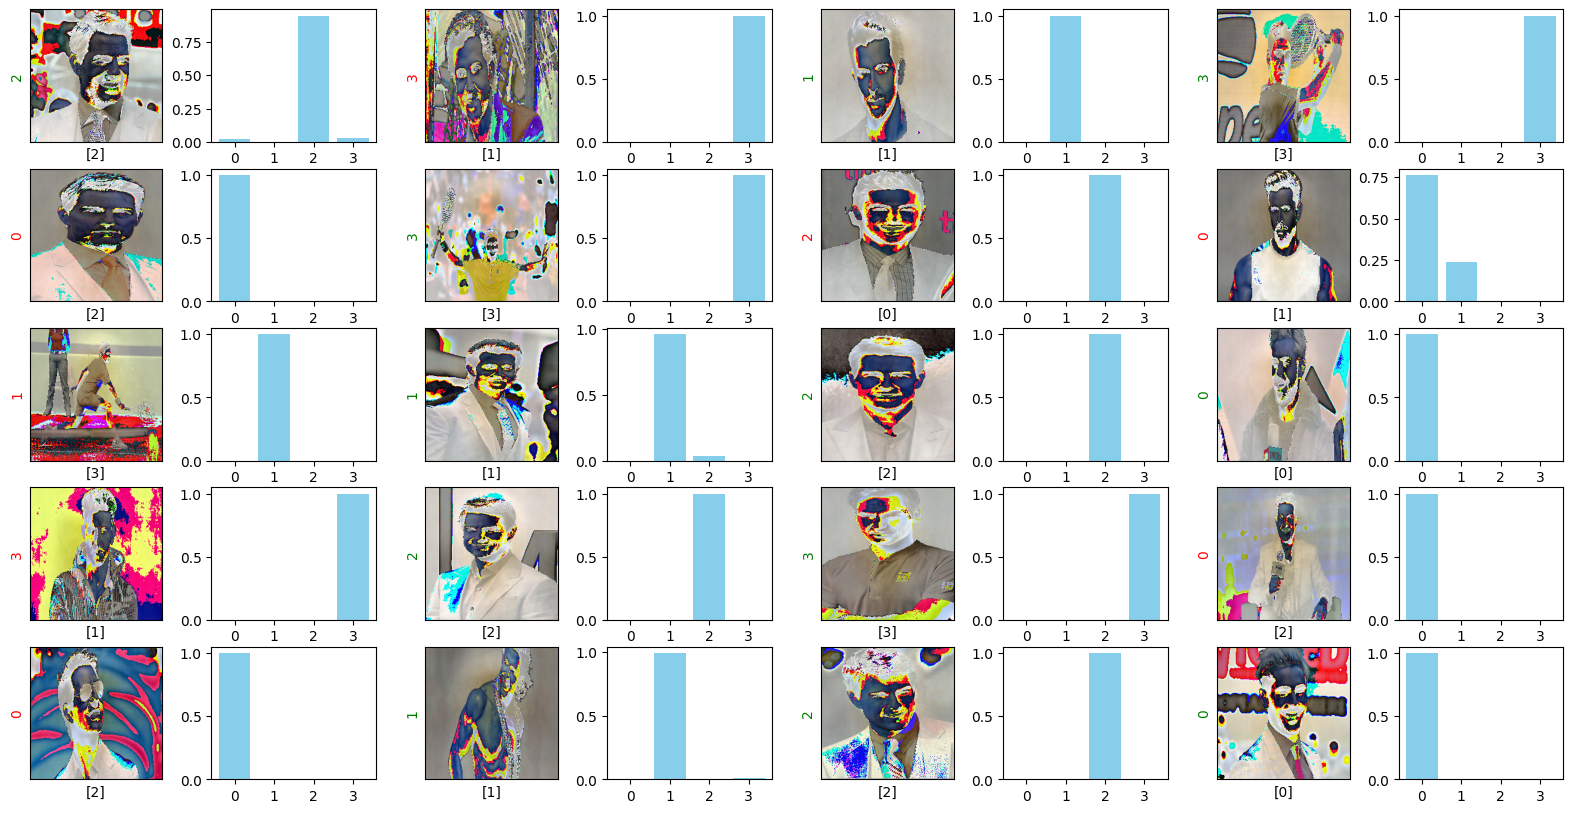

In [26]:
c=0
label=[0,1,2,3]
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,8,c+1)
    plt.imshow(X_test[i].astype('uint8'))
    plt.xlabel(Y_test[i])
    if(Y_test[i] == probability[i].argmax()):
        plt.ylabel(probability[i].argmax(), color='g')
    else:
        plt.ylabel(probability[i].argmax(), color='r')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(5,8,c+2)
    plt.bar(range(len(probability[i])), probability[i], color='skyblue')
    plt.xticks(range(len(label)), label)
    c+=2
plt.show()
    

In [27]:
probability[0]

array([0.02301271, 0.00317198, 0.9451863 , 0.02862898], dtype=float32)

In [28]:
model.save("model_alxeNet(with 2 new layer)_2.h5")